## Purchasing_latent_factors
#### Using factor analysis to identify latent factors in purchasing decisions.

Dataset: ficticius

#### Problem: Which factor is most critical for the customer to decide to make the purchase?

In [1]:
!pip install -q factor_analyzer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


In [19]:
df = pd.read_csv('dataset.csv')

In [20]:
df.head()

,shopping_frequency,average_value,most_purchased_category,time_store,use_app
0,6,264.693919,1,10.741316,2
1,6,154.865295,2,54.727444,2
2,5,212.729267,4,9.244390,4
3,5,270.765917,3,11.176717,5
4,4,85.332091,2,17.059377,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   shopping_frequency       500 non-null    int64  
 1   average_value            500 non-null    float64
 2   most_purchased_category  500 non-null    int64  
 3   time_store               500 non-null    float64
 4   use_app                  500 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


##### Factor analysis assumes that the predictor variables are correlated.

#### Teste Barlett

In [22]:
chi_square_value, p_value = calculate_bartlett_sphericity(df)

In [23]:
print('Estatística do Teste:', chi_square_value, '\nValor-p:', p_value)

Estatística do Teste: 2052.9294481847887 
Valor-p: 0.0


##### p-value < 0.05 suitable for factor analysis.

##### Teste KMO

In [24]:
kmo_all, kmo_model = calculate_kmo(df)

In [25]:
print('KMO Global: ', kmo_model)

KMO Global:  0.9119977905988942


In [26]:
print('KMO per variable:', kmo_all)

KMO per variable: [0.91498647 0.91967945 0.90208801 0.91444814 0.90950008]


##### Overall KMO greater than 0.6, factor analysis may be useful.

### Factor Analyzer

In [27]:
fa = FactorAnalyzer(rotation="varimax")

In [28]:
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

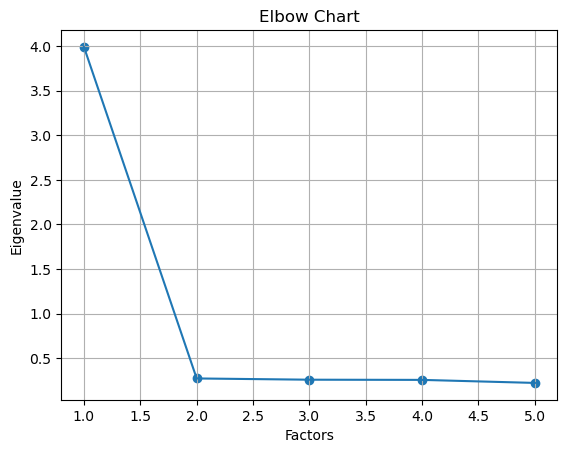

In [13]:
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1]+1), eigen_values)
plt.plot(range(1, df.shape[1]+1), eigen_values)
plt.title('Elbow Chart')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

##### 2 factors

In [29]:
fa = FactorAnalyzer(n_factors = 2, rotation = "varimax")
fa.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [30]:
loadings = fa.loadings_
print(loadings)

[[0.77025527 0.3985401 ]
 [0.73479724 0.4260281 ]
 [0.53652225 0.84092422]
 [0.74905294 0.42623636]
 [0.7418765  0.44453942]]


In [31]:
fa.get_communalities()

array([0.7521274 , 0.72142692, 0.99500967, 0.74275775, 0.74799604])

**Factor Loadings:**

After training the analyzer (fa.fit(df_dsa)), you can obtain the factor loadings with fa.loadings_. Factor loadings indicate the linear relationship between each variable and the factor. A high factor loading (in absolute value) indicates that the variable is strongly related to the factor. The sign of the factor loading indicates the direction of the relationship.

**Eigenvalues:**

Can check the eigenvalues ​​with fa.eigenvalues_. They represent the amount of variation explained by each factor. Commonly, a criterion called the "Kaiser criterion" is used, where only factors with eigenvalues ​​close to 1 are considered significant. However, this is just a heuristic and other techniques, such as elbow plot analysis, can also be used.

**Explained Variation:**

This indicates the proportion of the total variation in the data that is explained by the extracted factors. Typically, in factor analysis, we aim for a smaller set of factors that still captures a good proportion of the total variation in the data.

**Rotation:**

Rotation is a technique used to make the output of factor analysis more interpretable. Varimax rotation attempts to maximize the variance of factor loadings by making some factor loadings as close to 0 as possible and others as close to 1 or -1 as possible. This makes it easier to identify which variables are associated with which factors.

**Factor Scores:**

After training the analyzer, you can use fa.transform(df) to get the factor scores for each observation in your dataset. Factor scores represent the score of each observation on each factor.

**Communalities:**

Communalities, which can be accessed with fa.get_communalities(), represent the proportion of the variation in each variable that is explained by the factors. A value close to 1 indicates that the variable is well explained by the factors, while a value close to 0 indicates the opposite.

In [32]:
loadings = fa.loadings_
print(loadings)

[[0.77025527 0.3985401 ]
 [0.73479724 0.4260281 ]
 [0.53652225 0.84092422]
 [0.74905294 0.42623636]
 [0.7418765  0.44453942]]


In [33]:
df.columns

Index(['shopping_frequency', 'average_value', 'most_purchased_category',
       'time_store', 'use_app'],
      dtype='object')

**Interpretation:**

Factor 1 (F1): This factor has strong factor loadings for **purchase_frequency**, **average_value**, **store_time** and **app_use**, which suggests that this factor may be related to "general customer engagement" or "intensity of the customer's relationship with the store". It may represent customers who not only buy frequently, but also spend more time in the store, spend the same amount on average and use the app frequently.

Factor 2 (F2): This factor has a very strong factor loading for **most_purchased_category**, suggesting that it may be related to "customer loyalty to a type of product or brand". It may represent customers who seek out a specific product or brand and do not focus solely on the value of the product.
